# Getting started with OpenCV
OpenCV is the most widely used framework for computer vision tasks. It supports a wide variety of algorithms related to computer vision and machine learning and it is expanding day-by-day.

The purpose if this exercise is for you to get some hands-on experience with OpenCV by solving some basic image processing tasks.

The best place to start is here: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

## Task 1 - Core operations
You will learn some basic operations with OpenCV.

First, lets download an image to work on:

In [ ]:
# Check that the file is in your Drive
!ls "data/cat.jpg"

data/cat.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Task 1.1
Load the image from your Drive using OpenCV's imread function (not Pillow!).

Then display the image using Matplotlib (OpenCV's imshow function will not work in a notebook)

(1199, 1200, 3)


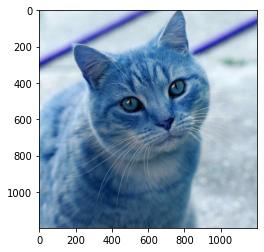

In [ ]:
# Read image using OpenCV
img = cv2.imread("data/cat.jpg") 

# Display image using Matplotlib
plt.imshow(img)

print(img.shape)

### Questions 1.1
1. What is the size of the image?

- 1199x1200
2. How many color channels does it have?

- 3
3. Why do the colors look so weird?

- Weird? Looks totally fine to me

### Tasks 1.2
Run this piece of code:

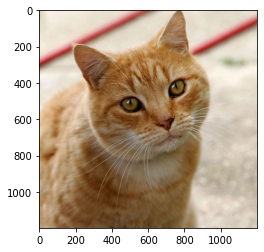

In [ ]:
b,g,r = cv2.split(img)
rgb = cv2.merge((r,g,b))
plt.imshow(rgb)

### Questions 1.2
1. What just happened?

- You split the color channels from BGR and merged them in the right order :)

### Task 1.3
Let's do some pixel operations:

(Need help? OpenCV images are simply Numpy arrays. Look under indexing in the Numpy tutorial: https://github.com/klaverhenrik/Deep-Learning-for-Visual-Recognition-2021/blob/main/Lab1_Tutorial.ipynb)

[214 230 236]


<function cvtColor>

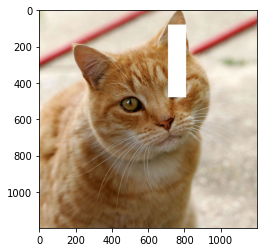

In [ ]:
# What is the color [b,g,r] of the pixel at location [100,100]?
print(img[100][100])

# Set the color the pixel at location [100,100] to the value [255,255,255]
img[100][100] = [255,255,255]

# Make the color of all pixels in the region [380:480, 710:810] white
img[80:480, 710:810] = [255,255,255]

# Display
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

cv2.cvtColor

### Questions 1.3
1. Where is the origin of the image coordinate system?
- left top just like windows :)
2. What is the direction of the first coordinate/axis?
- top to bottom
3. What is the direction of the second coordinate/axis?
- left to right
4. Oh, and what does the function cv2.cvtColor do?
- cv2.cvtColor() method is used to convert an image from one color space to another.

## Task 2
You will learn some basic image processing.

Where to find inspiration:
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#basic-ops
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html


### Task 2.1
Lets do some simple geometric transformations of the cat image:

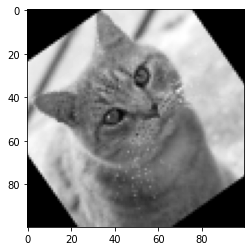

In [ ]:
#Reload cat image
img = cv2.imread('data/cat.jpg')

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize img to size 100 by 100
img = cv2.resize(img, (100,100))

# Now, rotate the resized image 35 degrees counter clockwise
angle = 35
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
img = cv2.warpAffine(img,M,(cols,rows))

# Display
plt.imshow(img, cmap='gray')

### Questions 2.1
1. How would you use cv2.resize to scale the image to half the original size?
- Get the image shape and half it
2. What do you think the matrix M does? Hint: See [here](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html)
- It's a translation matrix that is used for rotating the image.
3. What happens if you delete cmap='gray' in plt.imshow?
- It becomes funny colored :)

### Task 2.2
Let's try another image:

In [ ]:
# Check that the file is in your Drive
!ls "data/sudoku.jpg"

data/sudoku.jpg


Display the image:

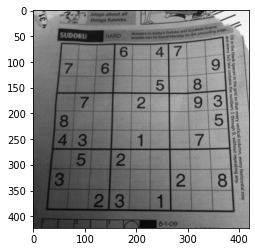

In [ ]:
# Load sudoku image
img = cv2.imread('data/sudoku.jpg')

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display
plt.imshow(img, cmap='gray')

Do some magic!

(<AxesSubplot:title={'center':'Output'}>,
 Text(0.5, 1.0, 'Output'))

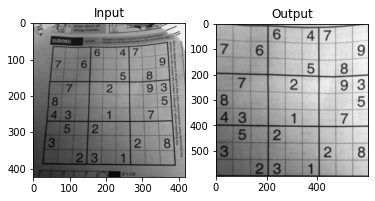

In [ ]:
rows,cols = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[600,0],[0,600],[600,600]])

M = cv2.getPerspectiveTransform(pts1,pts2)

img_aligned = cv2.warpPerspective(img,M,(600,600))

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Input')
plt.subplot(122),plt.imshow(img_aligned,cmap='gray'),plt.title('Output')

### Questions 2.2
1. Can you figure out how the coordinates ``pts1`` were selected?
- It's the corners of the suduko, pts2 is the points to warp to.
2. What does the transform ``warpPerspective`` do?
- Creates a translation matrix for warping the image such that pts1 matches pts2 and all other pixels are warped accordingly.

### Task 2.3
Suppose, you wanted to detect and recognize the individual numbers from the cells on the sudoku field. A first step towards achieving this could be to

1. make the image binary, such that pixels are either black or white
2. group black pixels into connected clusters (also called connected components)
3. recognize digits by performing some sort of template matching on each component against a database of digits

The first step is called thresholding:

(<AxesSubplot:title={'center':'thresh2'}>,
 Text(0.5, 1.0, 'thresh2'))

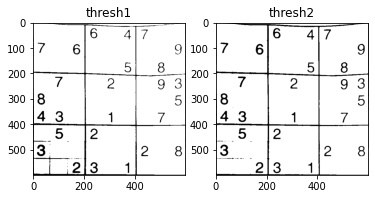

In [ ]:
ret,thresh1 = cv2.threshold(img_aligned,50,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img_aligned,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,1001,7)
#thresh2 = cv2.adaptiveThreshold()
plt.subplot(121),plt.imshow(thresh1,cmap='gray'),plt.title('thresh1')
plt.subplot(122),plt.imshow(thresh2,cmap='gray'),plt.title('thresh2')

### Questions 2.3
1. Explain how thresh1 is calculated
- It's a threshold for each pixel that is created using the method thresh-binary. If the color is above 100 in this case, then the output is 255 (white). Thresh-binary is a simple comparison of a single pixel, if source > 100 then set 255 else 0.


2. Explain how thresh2 is calculated
- the threshold value T(x,y) is a mean of the blockSize×blockSize neighborhood of (x,y) minus C. In this case 11x11 area minus 7.

### Task 2.4
We can use OpenCV findContours to find alle the connected components in a binary image. The algorithm looks for connected white pixels that are connected, so we first have to invert the binary image:

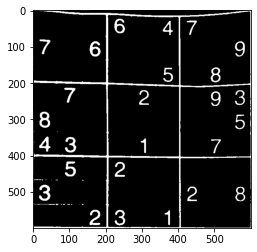

In [ ]:
thresh2_inv = cv2.bitwise_not(thresh2)
plt.imshow(thresh2_inv,cmap='gray')

Next, let's run findContours and look at the output:

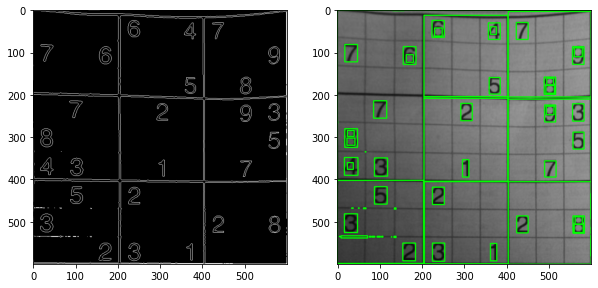

In [ ]:
contours, hierarchy = cv2.findContours(thresh2_inv,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

drawing_contours = np.zeros((img_aligned.shape[0],img_aligned.shape[1],3),dtype=np.uint8)
drawing_contours = cv2.drawContours(drawing_contours, contours, -1, (255,255,255), 1)

drawning_boxes = cv2.cvtColor(img_aligned,cv2.COLOR_GRAY2BGR)
for cnt in contours:
  x,y,w,h = cv2.boundingRect(cnt)
  drawning_boxes = cv2.rectangle(drawning_boxes,(x,y),(x+w,y+h),(0,255,0),2)

plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(drawing_contours,cmap='gray')
plt.subplot(122); plt.imshow(drawning_boxes,cmap='gray')

### Questions 2.4
``contours`` is a Python list of all the contours in the image.
1. How many contours are there?
- 81

### Task 2.5
Based on the output of findContours, see if you can generate a new image, containing just the numbers. You should remove the gridlines of the sudoku field, as well as noise.

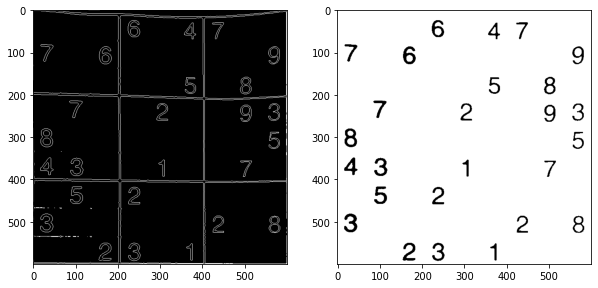

In [ ]:
contours, hierarchy = cv2.findContours(thresh2_inv,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

drawing_contours = np.zeros((img_aligned.shape[0],img_aligned.shape[1],3),dtype=np.uint8)
drawing_contours = cv2.drawContours(drawing_contours, contours, -1, (255,255,255), 1)

drawing_boxes = np.full((img_aligned.shape[0],img_aligned.shape[1]), 255, dtype=np.uint8)

thresh2

for cnt in contours:
  x,y,w,h = cv2.boundingRect(cnt)
  if w > 10 and h > 30 and h < 100 and w < 100:
    drawing_boxes[y:y+h,x:x+w] = thresh2[y:y+h, x:x+w]
    #cv2.rectangle(drawing_boxes,(x,y),(x+w,y+h),(0,255,0),2)

plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(drawing_contours,cmap='gray')
plt.subplot(122); plt.imshow(drawing_boxes,cmap='gray')

## Task 3
You will learn about image gradients and smoothing.

Where to find inspiration:
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html


Let's continue working on the sudoku image:

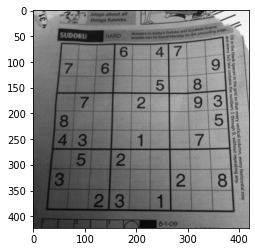

In [ ]:
# Load sudoku image
img = cv2.imread('data/sudoku.jpg')

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display
plt.imshow(img, cmap='gray')

### Task 3.1
Recall that in vector calculus, the gradient is a multi-variable generalization of the derivative. Thinking of an image as a 2D function, the gradient at each position (pixel) indicates how much the intensity varies along the X- and Y-direction.

A simple way to approximate the derivate along X and Y is to simply take pixel differences:

(<matplotlib.image.AxesImage at 0x7f56338b6710>,
 Text(0.5, 1.0, 'Iy: Derivate along Y'))

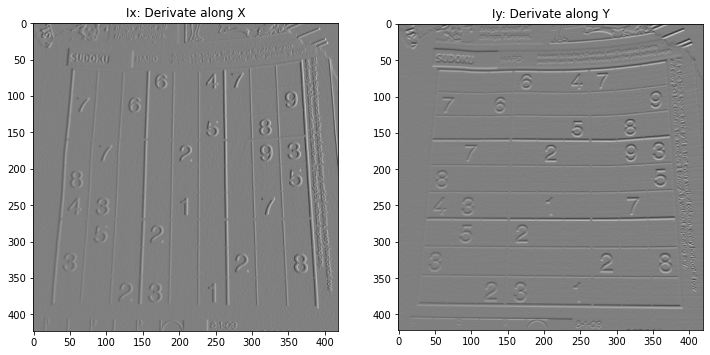

In [ ]:
# First convert to float and normalize intensities to range 0.0 to 1.0
img_float = img.astype(np.float32) / 255.

# Approximate derivate along X
Ix = np.diff(img_float, axis=1)

# Approximate derivate along Y
Iy = np.diff(img_float, axis=0)

plt.figure(figsize=(12,12))
plt.subplot(121);
plt.imshow(Ix,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Ix: Derivate along X')
plt.subplot(122);
plt.imshow(Iy,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Iy: Derivate along Y')

Plot image intensities (img_float) and derivate (Ix) along row 200.

Also, display Ix again but this time with amplified intensities (using vmin and vmax).

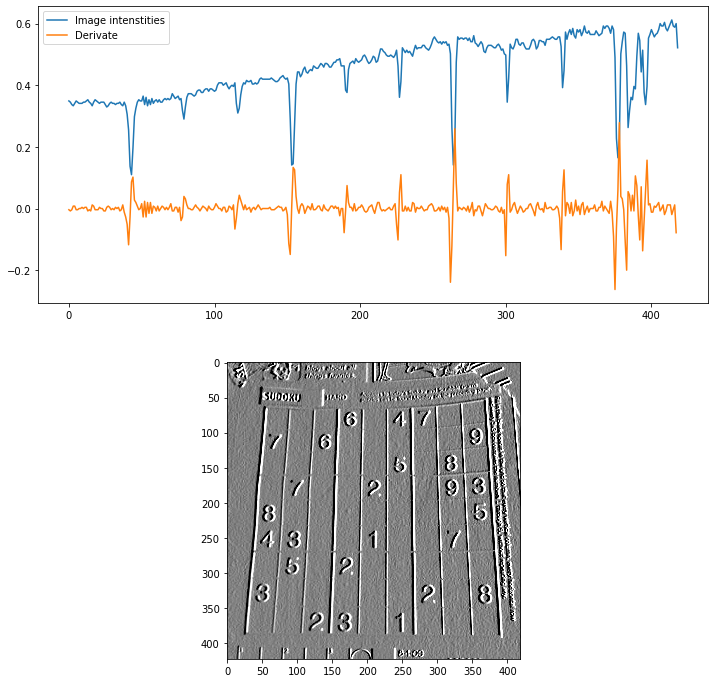

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(211); plt.plot(img_float[200,:]); plt.plot(Ix[200,:]), plt.legend(('Image intenstities','Derivate'))
plt.subplot(212); plt.imshow(Ix,cmap='gray',vmin=-0.05,vmax=0.05)

### Questions 3.1
1. Explain what you see in the two images above (Ix and Iy)?
- The approximate derivative from left to right Ix and top to bottom Iy. It's the difference in value from one pixel to the next.
2. What is the difference between the two images?
- The direction.
3. Explain what you see in the plot of Ix along row 200 and amplified Ix image? Why is the image so noisy?
- The same as above? The difference in pixel value along the x-axis. The image intensities is the pixel value [0:255] mapped to [0:1] \\
Small changes in pixel values results in the noisy image.

### Task 3.2
Let's try to smoothen the input image and then recalculate the gradients:


(<matplotlib.image.AxesImage at 0x7f5631ad7c90>,
 Text(0.5, 1.0, 'Iy: Derivate along Y'))

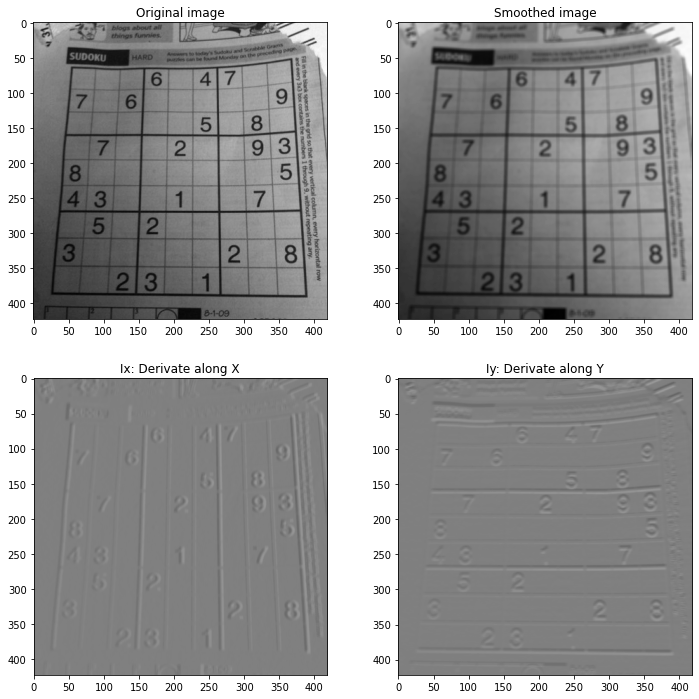

In [ ]:
# kernel = np.array([-1,1])
kernel = np.ones((5,5))/25
img_float_smoothed = cv2.filter2D(img_float,-1,kernel)

# Approximate derivate along X
Ix = np.diff(img_float_smoothed, axis=1)

# Approximate derivate along Y
Iy = np.diff(img_float_smoothed, axis=0)

plt.figure(figsize=(12,12))
plt.subplot(221);
plt.imshow(img_float,cmap='gray'), plt.title('Original image')
plt.subplot(222);
plt.imshow(img_float_smoothed,cmap='gray'), plt.title('Smoothed image')
plt.subplot(223);
plt.imshow(Ix,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Ix: Derivate along X')
plt.subplot(224);
plt.imshow(Iy,cmap='gray',vmin=-0.5,vmax=0.5), plt.title('Iy: Derivate along Y')

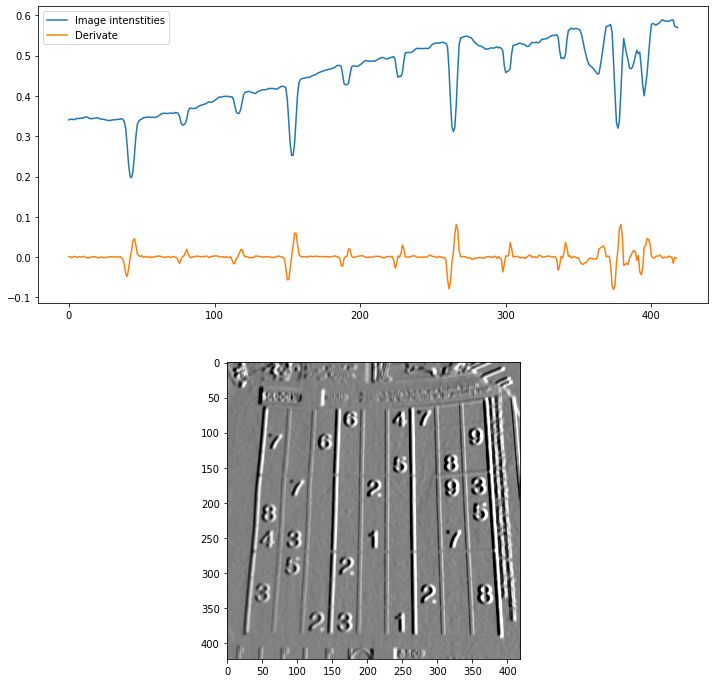

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(211); plt.plot(img_float_smoothed[200,:]); plt.plot(Ix[200,:]), plt.legend(('Image intenstities','Derivate'))
plt.subplot(212); plt.imshow(Ix,cmap='gray',vmin=-0.05,vmax=0.05)

Notice any difference?

### Questions 3.2
1. See if you can figure out how filtering works (see [here](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html))

- Works as a convolution

2. Why does the filtering smoothen the image?
- Averages value in a 5x5 area
3. Can you figure out a way to calculate the image gradients using filtering? (Hint: You need to design a filter on your own!)
- kernel = np.array([-1,1]), makes Iy
4. Can you calculate an image that displays the magnitude of the gradient at each pixel location?

## Task 4
You will learn about template matching.

Where to find inspiration:
* https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html

### Task 4.1
Inspect the cat image and create a template by cropping out an image region corresponding to the cat's left eye (your right-hand side). The eye is roughly at ``[380:480, 710:810]``. You may need to fine-tune the cooordinates.

NameError: name 'template' is not defined

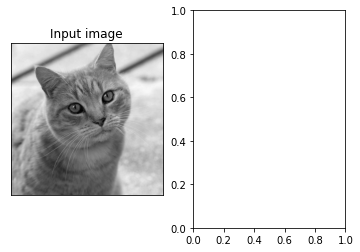

In [ ]:
# Load cat image
bgr = cv2.imread('data/cat.jpg')

# Convert to grayscale
img = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# Display
plt.imshow(img, cmap='gray')

# Create template
# template = <Your code goes here>

# Display the image and the template
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122);plt.imshow(template, cmap='gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])
plt.show()

### Task 4.2
Your task is to detect the other eye using template matching (i.e., detect cat's right eye by using the left eye as a kind of "search template"). Use this as inspiration:
https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html

Use the TM_CCOEFF_NORMED distance metric.

You may find the ``where`` function af numpy useful: https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

In [ ]:
# Apply template Matching
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)

# <Your code goes here>

## Optional tasks
If you have more time, feel free to look into [feature detection and matching](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html):
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_meaning/py_features_meaning.html#features-meaning
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html#matcher
* https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html#feature-homography

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c87fb65-b84c-4ca8-81c4-85560a342567' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>